#HOME LOAN APPROVAL (PREDICTIVE ANALYTICS)
*   Nama: Iva Raudyatuzzahra
*   Dataset : https://www.kaggle.com/datasets/rishikeshkonapure/home-loan-approval

#Data Collection

Import library & packages

In [157]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Load dataset

In [158]:
data = pd.read_csv('/content/loan_sanction_train.csv')
data

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


#Exploratory Data Analysis

##Variable Description

In [159]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


##Drop Loan_ID

In [160]:
data.drop(['Loan_ID'], axis=1, inplace = True)
data

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...
609,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


##Statistic Description

In [161]:
data.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


##Checking missing values

In [162]:
data.isnull().sum()

Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

##Handling Missing Values
Karena jumlah data yang terbatas, data yg mengandung missing value tidak akan di-drop melainkan akan disubtitusi dengan nilai yg sering muncul (modus) kecuali untuk kolom Loan_Amount akan disubtitusi dengan nilai rata-ratanya

###Mencari common answer atau modus data

In [163]:
import statistics
print('the common answer for Gender column:', statistics.mode(data['Gender']))
print('the common answer for Married column:', statistics.mode(data['Married']))
print('the common answer for Dependents column:', statistics.mode(data['Dependents']))
print('the common answer for Self_Employed column:', statistics.mode(data['Self_Employed']))
print('the common answer for Loan_Amount_Term column:', statistics.mode(data['Loan_Amount_Term']))
print('the common answer for Credit_History column:', statistics.mode(data['Credit_History']))

the common answer for Gender column: Male
the common answer for Married column: Yes
the common answer for Dependents column: 0
the common answer for Self_Employed column: No
the common answer for Loan_Amount_Term column: 360.0
the common answer for Credit_History column: 1.0


###Impute missing values

In [164]:
new_data = data.copy()

new_data['Gender'].fillna(new_data['Gender'].value_counts().idxmax(), inplace=True)
new_data['Married'].fillna(new_data['Married'].value_counts().idxmax(), inplace=True)
new_data['Dependents'].fillna(new_data['Dependents'].value_counts().idxmax(), inplace=True)
new_data['Self_Employed'].fillna(new_data['Self_Employed'].value_counts().idxmax(), inplace=True)
new_data["LoanAmount"].fillna(new_data["LoanAmount"].mean(skipna=True), inplace=True)
new_data['Loan_Amount_Term'].fillna(new_data['Loan_Amount_Term'].value_counts().idxmax(), inplace=True)
new_data['Credit_History'].fillna(new_data['Credit_History'].value_counts().idxmax(), inplace=True)


###Recheck missing values

In [165]:
new_data.isnull().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

Jumlah Pinjaman yang disetujui dan tidak :
Y    422
N    192
Name: Loan_Status, dtype: int64


<Axes: xlabel='Loan_Status', ylabel='count'>

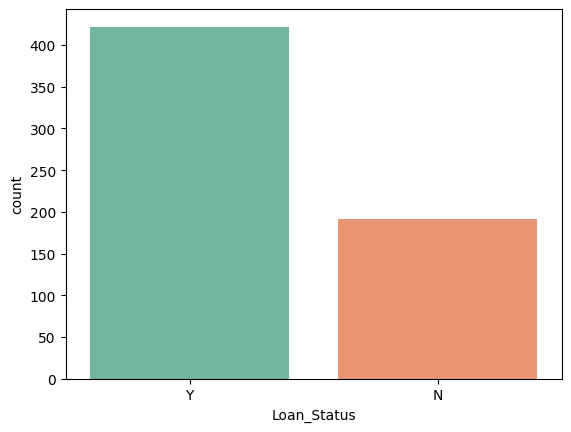

In [166]:
print("Jumlah Pinjaman yang disetujui dan tidak :")
print(data['Loan_Status'].value_counts())
sns.countplot(x='Loan_Status', data=data, palette = 'Set2')

#Data Preparation

##Encoding

Mengubah kolom kategorikal (Gender, Married, Dependents, Education, Self_Employed, Property_Area) menjadi numerik

In [167]:
new_data1 = new_data.copy()

In [168]:
gender_dummies = pd.get_dummies(new_data1['Gender'],prefix="Gender",drop_first=True)
new_data1 = new_data1.drop('Gender',axis = 1)
new_data1 = new_data1.join(gender_dummies)
new_data1['Married'] = new_data1['Married'].map({'Yes':1, 'No':2})
new_data1['Self_Employed'] = new_data1['Self_Employed'].map({'Yes':1, 'No':2})
new_data1['Education'] = new_data1['Education'].map({'Graduate':1, 'Not Graduate':2})
new_data1['Loan_Status'] = new_data1['Loan_Status'].map({'Y':1, 'N':2})
new_data1['Dependents'] = new_data1['Dependents'].map({'0': 0, '1':1, '2':2, '3+':3})
PA_dummies = pd.get_dummies(new_data1['Property_Area'],prefix="PA",drop_first=True)
new_data1 = new_data1.drop('Property_Area',axis = 1)
new_data1 = new_data1.join(PA_dummies)

new_data1.head()

,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,Gender_Male,PA_Semiurban,PA_Urban
0,2,0,1,2,5849,0.0,146.412162,360.0,1.0,1,1,0,1
1,1,1,1,2,4583,1508.0,128.000000,360.0,1.0,2,1,0,0
2,1,0,1,1,3000,0.0,66.000000,360.0,1.0,1,1,0,1
3,1,0,2,2,2583,2358.0,120.000000,360.0,1.0,1,1,0,1
4,2,0,1,2,6000,0.0,141.000000,360.0,1.0,1,1,0,1


##Split Data
Membagi dataset menjadi train dan test data

In [169]:
X = new_data1.drop('Loan_Status',axis = 1)
y = new_data1['Loan_Status']

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

#Model Development

Import library

In [170]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import cross_val_score

membuat variabel

In [171]:
classifier = ('K-Nearest Neighbor', 'Random Forest', 'Gradient Boosting')
y_pos = np.arange(len(classifier))
score = []

##KNN

In [172]:
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
knn.get_params(deep=True)

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 5,
 'p': 2,
 'weights': 'uniform'}

##Random Forest

In [173]:
rf = RandomForestClassifier(n_estimators=10)
rf.fit(X_train, y_train)
rf.get_params(deep=True)


{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 10,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

##Gradient Boosting

In [174]:
gb = GradientBoostingClassifier()
gb.fit(X_train, y_train)
gb.get_params(deep=True)

{'ccp_alpha': 0.0,
 'criterion': 'friedman_mse',
 'init': None,
 'learning_rate': 0.1,
 'loss': 'log_loss',
 'max_depth': 3,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_iter_no_change': None,
 'random_state': None,
 'subsample': 1.0,
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': 0,
 'warm_start': False}

#Evaluation

##Akurasi

In [175]:
scores = cross_val_score(knn, X, y,cv=5)
score.append(scores.mean())
print('Akurasi model KNN adalah %.2f%%' %(scores.mean()*100))

Akurasi model KNN adalah 61.40%


In [176]:
scores = cross_val_score(rf, X, y,cv=5)
score.append(scores.mean())
print('Akurasi model Random Forest adalah %.2f%%' %(scores.mean()*100))

Akurasi model Random Forest adalah 77.03%


In [177]:
scores = cross_val_score(gb, X, y,cv=5)
score.append(scores.mean())
print('Akurasi model Gradient Boosting adalah %.2f%%' %(scores.mean()*100))

Akurasi model Gradient Boosting adalah 77.69%


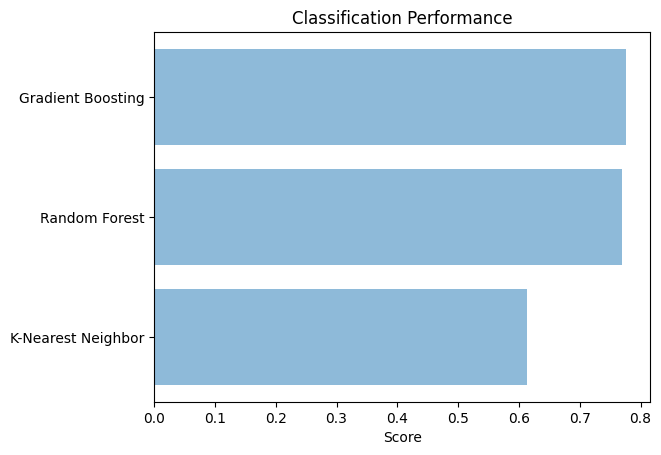

In [178]:
plt.barh(y_pos, score, align='center', alpha=0.5)
plt.yticks(y_pos, classifier)
plt.xlabel('Score')
plt.title('Classification Performance')
plt.show()

##MSE

In [179]:
from sklearn.metrics import mean_squared_error
mse = pd.DataFrame(columns=['train', 'test'], index=['KNN','RF','Boosting'])

model_dict = {'KNN': knn, 'RF': rf, 'Boosting': gb}

for name, model in model_dict.items():
    mse.loc[name, 'train'] = mean_squared_error(y_true=y_train, y_pred=model.predict(X_train))/1e3
    mse.loc[name, 'test'] = mean_squared_error(y_true=y_test, y_pred=model.predict(X_test))/1e3

mse

,train,test
KNN,0.000273,0.00039
RF,0.000016,0.000244
Boosting,0.000098,0.00022


##Prediction

In [180]:
prediksi = X_test.iloc[25:29].copy()
pred_dict = {'y_true':y_test[25:29]}
for name, model in model_dict.items():
    pred_dict['prediksi_'+name] = model.predict(prediksi).round(1)

pd.DataFrame(pred_dict)

,y_true,prediksi_KNN,prediksi_RF,prediksi_Boosting
380,1,1,1,1
354,1,2,1,1
360,2,1,1,1
373,2,1,2,2
